In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)



In [2]:
df=pd.read_csv('/Users/mohitsinghchandel/Desktop/Downloads/customer_churn.csv')

In [3]:
print("Dataset Shape:", df.shape)



Dataset Shape: (7043, 21)


In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())



Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Fix TotalCharges (convert to numeric and handle missing)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"\nMissing TotalCharges after conversion: {df['TotalCharges'].isnull().sum()}")

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID (not useful for prediction)
df.drop('customerID', axis=1, inplace=True)



Missing TotalCharges after conversion: 11


In [9]:

# Target variable distribution
print("\nChurn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Percentage:")
print(df['Churn'].value_counts(normalize=True) * 100)


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


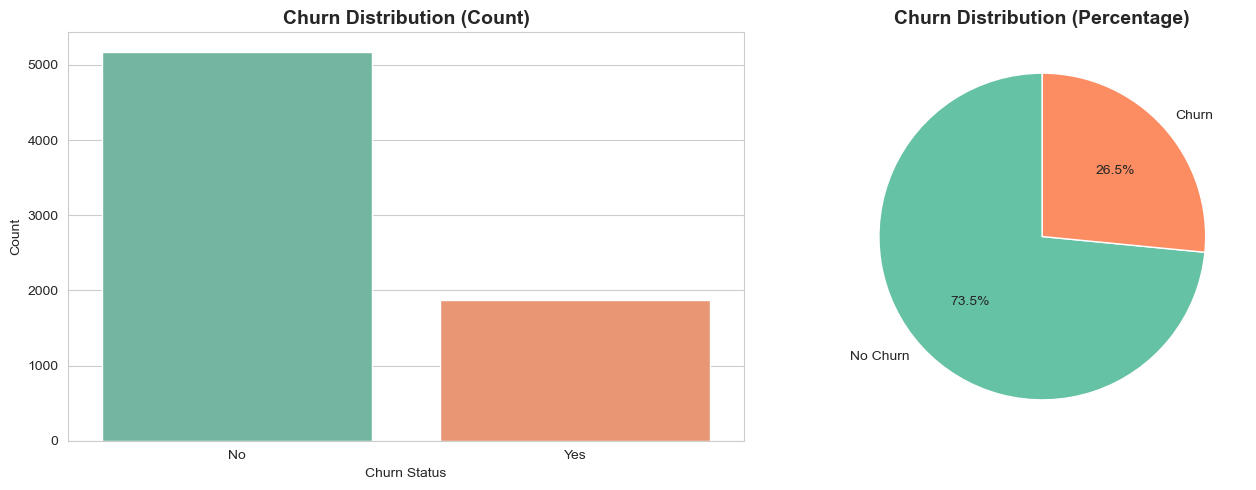

In [10]:
# Visualize churn distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(x='Churn', data=df, palette='Set2', ax=ax[0])
ax[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Churn Status')
ax[0].set_ylabel('Count')

# Percentage pie chart
churn_counts = df['Churn'].value_counts()
ax[1].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', 
          colors=['#66c2a5', '#fc8d62'], startangle=90)
ax[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

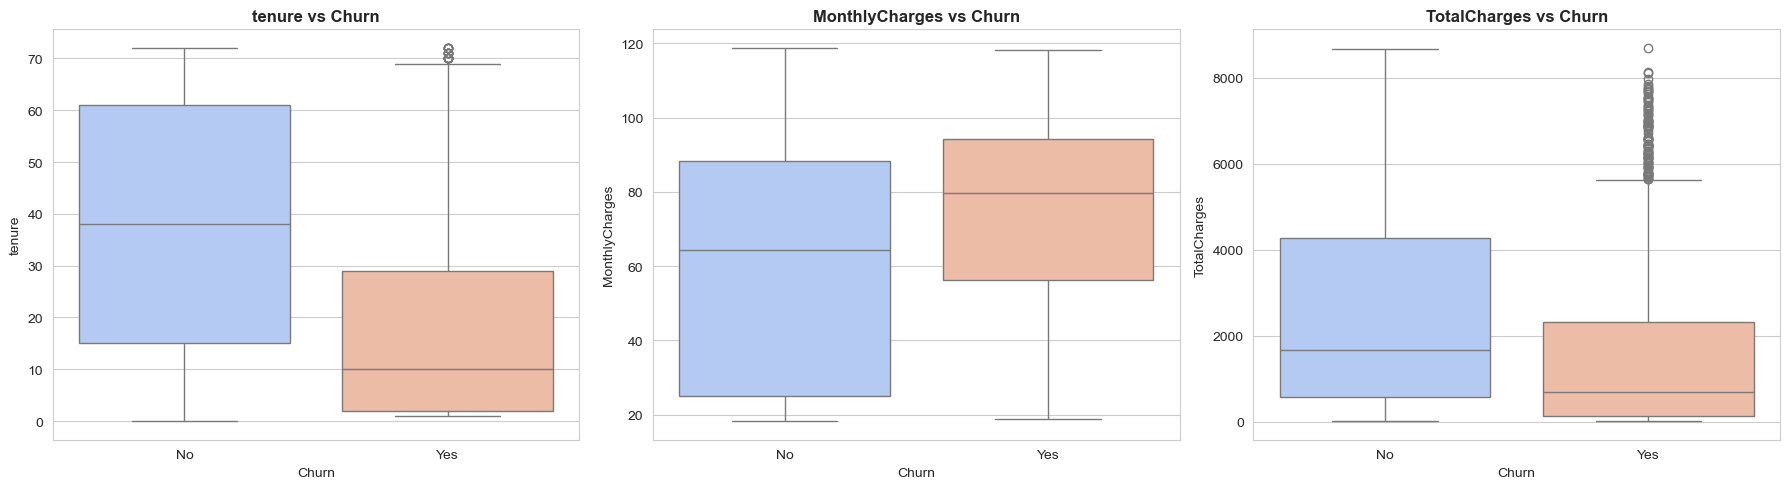

In [11]:
# Analyze numerical features vs Churn
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


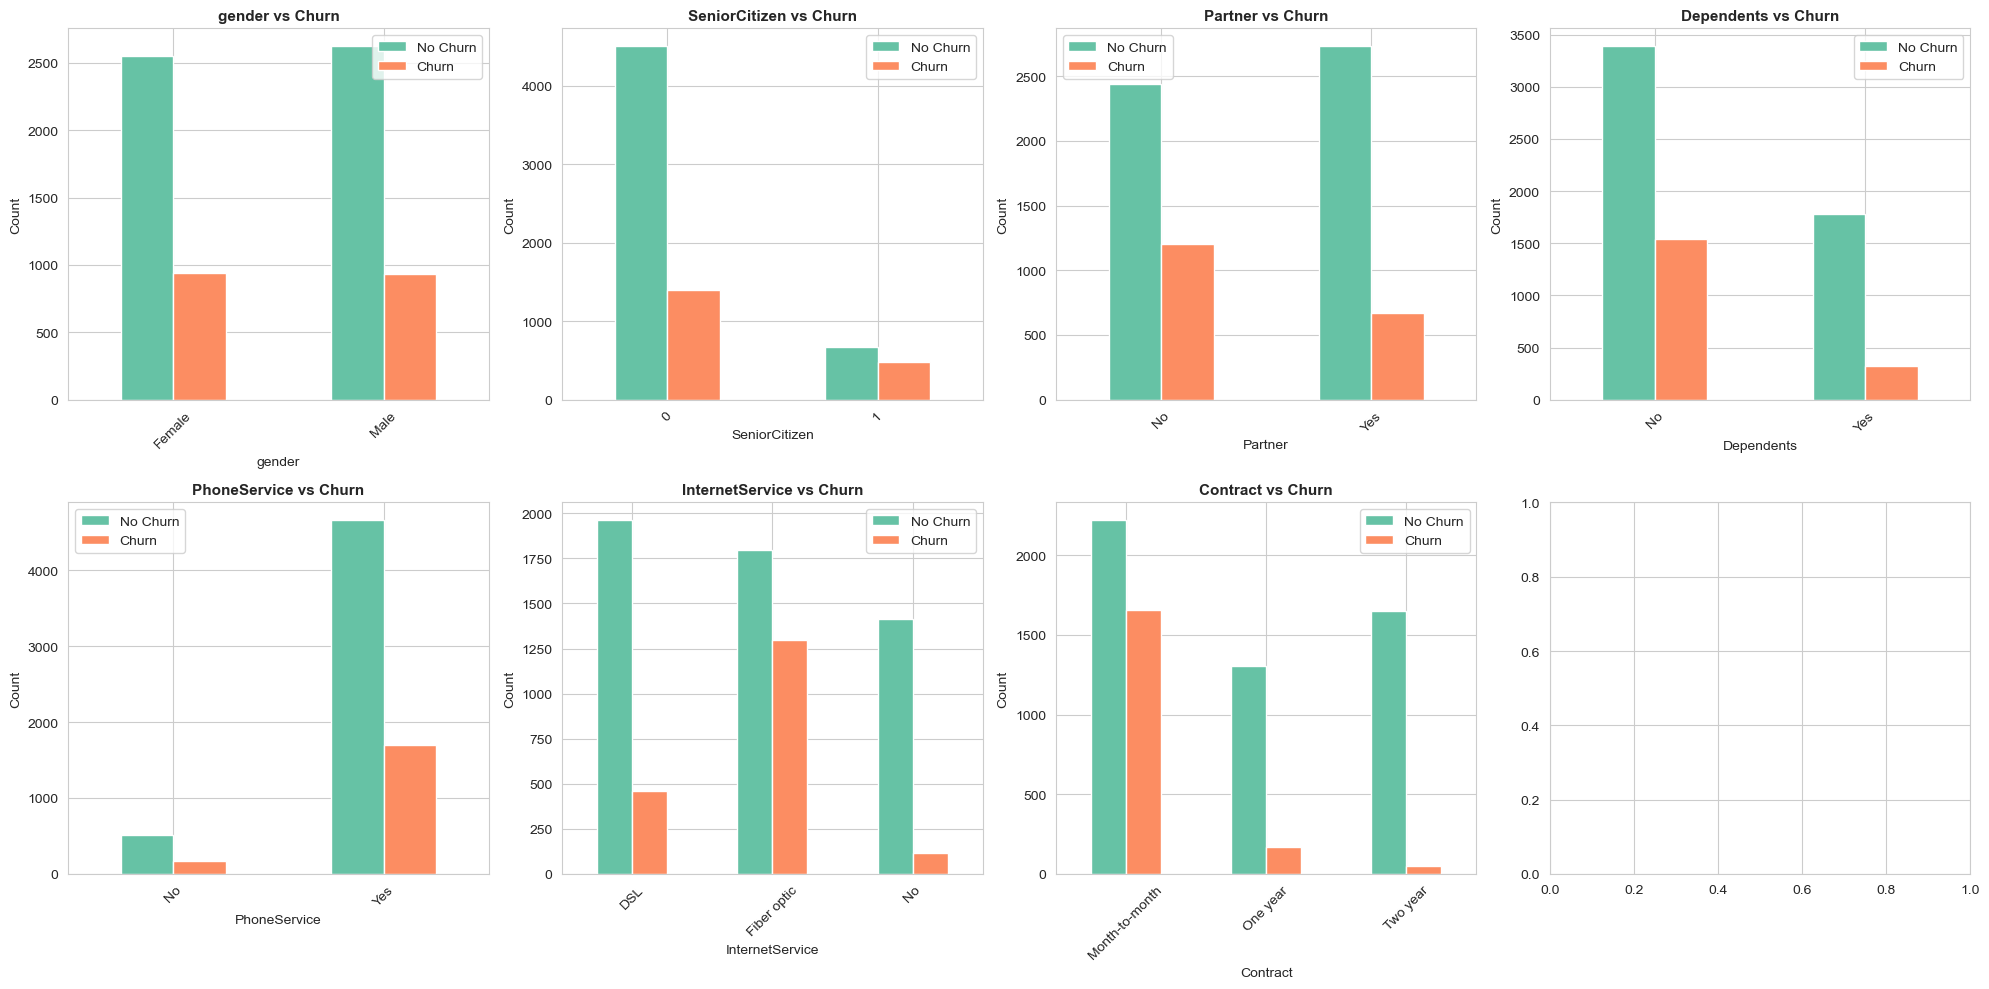

In [12]:
# Analyze categorical features vs Churn
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'InternetService', 'Contract']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df_temp = df.groupby([col, 'Churn']).size().unstack()
    df_temp.plot(kind='bar', stacked=False, ax=axes[i], color=['#66c2a5', '#fc8d62'])
    axes[i].set_title(f'{col} vs Churn', fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(['No Churn', 'Churn'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


 Create advanced features inspired by RFM (Recency, Frequency, Monetary) analysis commonly used in customer analytics. These engineered features capture customer behavior patterns more effectively than raw features alone.

In [14]:
# Create Tenure Groups (customer lifecycle stages)
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 48:
        return '2-4 Years'
    elif tenure <= 60:
        return '4-5 Years'
    else:
        return '5+ Years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

# Create RFM-style features (Recency, Frequency, Monetary concepts)
# Recency: Lower tenure = more recent customer
df['Recency_Score'] = pd.cut(df['tenure'], bins=5, labels=[5,4,3,2,1])

# Frequency: More services = higher engagement frequency
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']
df['ServiceCount'] = df[service_cols].apply(lambda x: sum(x != 'No'), axis=1)

# Monetary: Monthly and Total charges
df['ChargesPerTenure'] = df['TotalCharges'] / (df['tenure'] + 1)  # Avoid division by zero

# Create interaction features
df['Tenure_MonthlyCharges'] = df['tenure'] * df['MonthlyCharges']
df['Contract_Tenure'] = df['Contract'] + '_' + df['TenureGroup']

print("\nNew Features Created:")
print(df[['TenureGroup', 'Recency_Score', 'ServiceCount', 'ChargesPerTenure']].head())



New Features Created:
  TenureGroup Recency_Score  ServiceCount  ChargesPerTenure
0    0-1 Year             5             2         14.925000
1   2-4 Years             3             4         53.985714
2    0-1 Year             5             4         36.050000
3   2-4 Years             2             4         40.016304
4    0-1 Year             5             2         50.550000


In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,Recency_Score,ServiceCount,ChargesPerTenure,Tenure_MonthlyCharges,Contract_Tenure
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,0-1 Year,5,2,14.925000,29.85,Month-to-month_0-1 Year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,2-4 Years,3,4,53.985714,1936.30,One year_2-4 Years
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,0-1 Year,5,4,36.050000,107.70,Month-to-month_0-1 Year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,2-4 Years,2,4,40.016304,1903.50,One year_2-4 Years
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,0-1 Year,5,2,50.550000,141.40,Month-to-month_0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Mailed check,84.80,1990.50,No,1-2 Years,4,7,79.620000,2035.20,One year_1-2 Years
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Credit card (automatic),103.20,7362.90,No,5+ Years,1,6,100.861644,7430.40,One year_5+ Years
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Electronic check,29.60,346.45,No,0-1 Year,5,2,28.870833,325.60,Month-to-month_0-1 Year
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,Mailed check,74.40,306.60,Yes,0-1 Year,5,2,61.320000,297.60,Month-to-month_0-1 Year


In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])




In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,Recency_Score,ServiceCount,ChargesPerTenure,Tenure_MonthlyCharges,Contract_Tenure
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,Electronic check,29.85,29.85,No,0-1 Year,5,2,14.925000,29.85,Month-to-month_0-1 Year
1,1,0,0,0,34,1,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,2-4 Years,3,4,53.985714,1936.30,One year_2-4 Years
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,0-1 Year,5,4,36.050000,107.70,Month-to-month_0-1 Year
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,2-4 Years,2,4,40.016304,1903.50,One year_2-4 Years
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,0-1 Year,5,2,50.550000,141.40,Month-to-month_0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,...,Mailed check,84.80,1990.50,No,1-2 Years,4,7,79.620000,2035.20,One year_1-2 Years
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,Credit card (automatic),103.20,7362.90,No,5+ Years,1,6,100.861644,7430.40,One year_5+ Years
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,...,Electronic check,29.60,346.45,No,0-1 Year,5,2,28.870833,325.60,Month-to-month_0-1 Year
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,...,Mailed check,74.40,306.60,Yes,0-1 Year,5,2,61.320000,297.60,Month-to-month_0-1 Year


In [18]:
if 'MultipleLines' in df.columns:
    df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,Recency_Score,ServiceCount,ChargesPerTenure,Tenure_MonthlyCharges,Contract_Tenure
0,0,0,1,0,1,0,No,DSL,No,Yes,...,Electronic check,29.85,29.85,No,0-1 Year,5,2,14.925000,29.85,Month-to-month_0-1 Year
1,1,0,0,0,34,1,No,DSL,Yes,No,...,Mailed check,56.95,1889.50,No,2-4 Years,3,4,53.985714,1936.30,One year_2-4 Years
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,Mailed check,53.85,108.15,Yes,0-1 Year,5,4,36.050000,107.70,Month-to-month_0-1 Year
3,1,0,0,0,45,0,No,DSL,Yes,No,...,Bank transfer (automatic),42.30,1840.75,No,2-4 Years,2,4,40.016304,1903.50,One year_2-4 Years
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,Electronic check,70.70,151.65,Yes,0-1 Year,5,2,50.550000,141.40,Month-to-month_0-1 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,...,Mailed check,84.80,1990.50,No,1-2 Years,4,7,79.620000,2035.20,One year_1-2 Years
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,...,Credit card (automatic),103.20,7362.90,No,5+ Years,1,6,100.861644,7430.40,One year_5+ Years
7040,0,0,1,1,11,0,No,DSL,Yes,No,...,Electronic check,29.60,346.45,No,0-1 Year,5,2,28.870833,325.60,Month-to-month_0-1 Year
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,...,Mailed check,74.40,306.60,Yes,0-1 Year,5,2,61.320000,297.60,Month-to-month_0-1 Year


In [20]:
# Encode multi-class categorical variables
multi_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Drop original categorical columns that were engineered
df.drop(['TenureGroup', 'Contract_Tenure'], axis=1, inplace=True, errors='ignore')

print("\nDataset shape after encoding:", df.shape)
print("\nColumn names:", df.columns.tolist())


Dataset shape after encoding: (7043, 34)

Column names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Recency_Score', 'ServiceCount', 'ChargesPerTenure', 'Tenure_MonthlyCharges', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   gender                                 7043 non-null   int64   
 1   SeniorCitizen                          7043 non-null   int64   
 2   Partner                                7043 non-null   int64   
 3   Dependents                             7043 non-null   int64   
 4   tenure                                 7043 non-null   int64   
 5   PhoneService                           7043 non-null   int64   
 6   MultipleLines                          7043 non-null   object  
 7   PaperlessBilling                       7043 non-null   int64   
 8   MonthlyCharges                         7043 non-null   float64 
 9   TotalCharges                           7043 non-null   float64 
 10  Churn                                  7043 non-null   int64

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,No,1,29.85,29.85,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,No,0,56.95,1889.50,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,No,1,53.85,108.15,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,No,0,42.30,1840.75,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,No,1,70.70,151.65,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,1,84.80,1990.50,...,True,False,True,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,Yes,1,103.20,7362.90,...,False,False,True,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,No,1,29.60,346.45,...,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,Yes,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,True


In [23]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': True, 'No': False})


In [24]:
df['Recency_Score']=df['Recency_Score'].astype('int')

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data (80% train, 20% test) with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())


Training set size: (5634, 33)
Testing set size: (1409, 33)

Class distribution in training set:
Churn
0    4139
1    1495
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Training set before SMOTE:", X_train.shape, "Churn ratio:", y_train.value_counts()[1]/len(y_train))
print("Training set after SMOTE:", X_train_balanced.shape, "Churn ratio:", y_train_balanced.value_counts()[1]/len(y_train_balanced))


Training set before SMOTE: (5634, 33) Churn ratio: 0.2653532126375577
Training set after SMOTE: (8278, 33) Churn ratio: 0.5


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"\n{'='*60}")
    print(f"{model_name} Results:")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred))

# Compare models
results_df = pd.DataFrame(results).T
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(results_df.round(4))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1035
           1       0.46      0.53      0.49       374

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.73      0.71      0.72      1409


Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.59      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1

In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest (best performer typically)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

print("Starting GridSearchCV... This may take a few minutes.")
grid_search.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n" + "="*60)
print("OPTIMIZED MODEL PERFORMANCE")
print("="*60)
print(classification_report(y_test, y_pred_best))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_best):.4f}")


Starting GridSearchCV... This may take a few minutes.
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimator

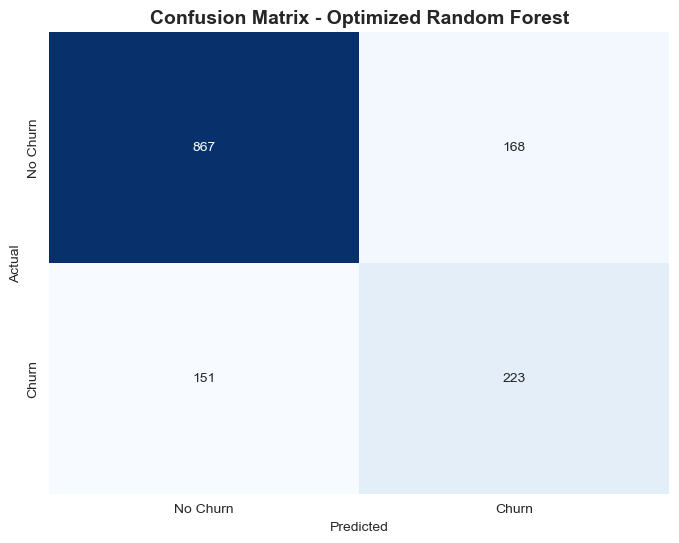

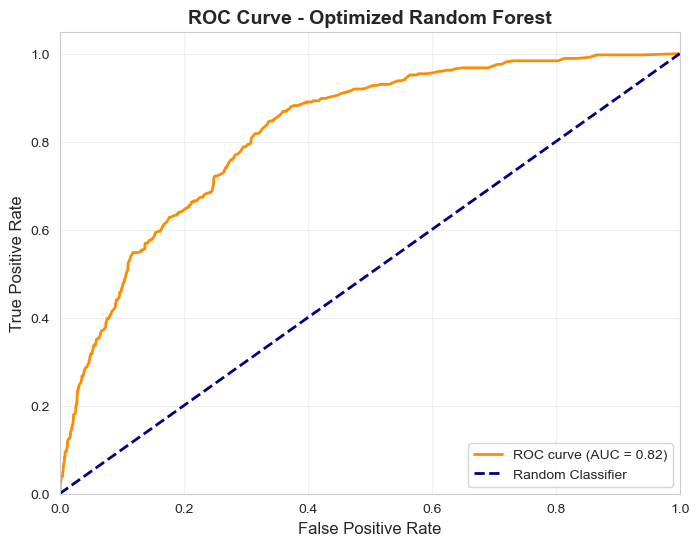

In [29]:
from sklearn.metrics import roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Optimized Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Optimized Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


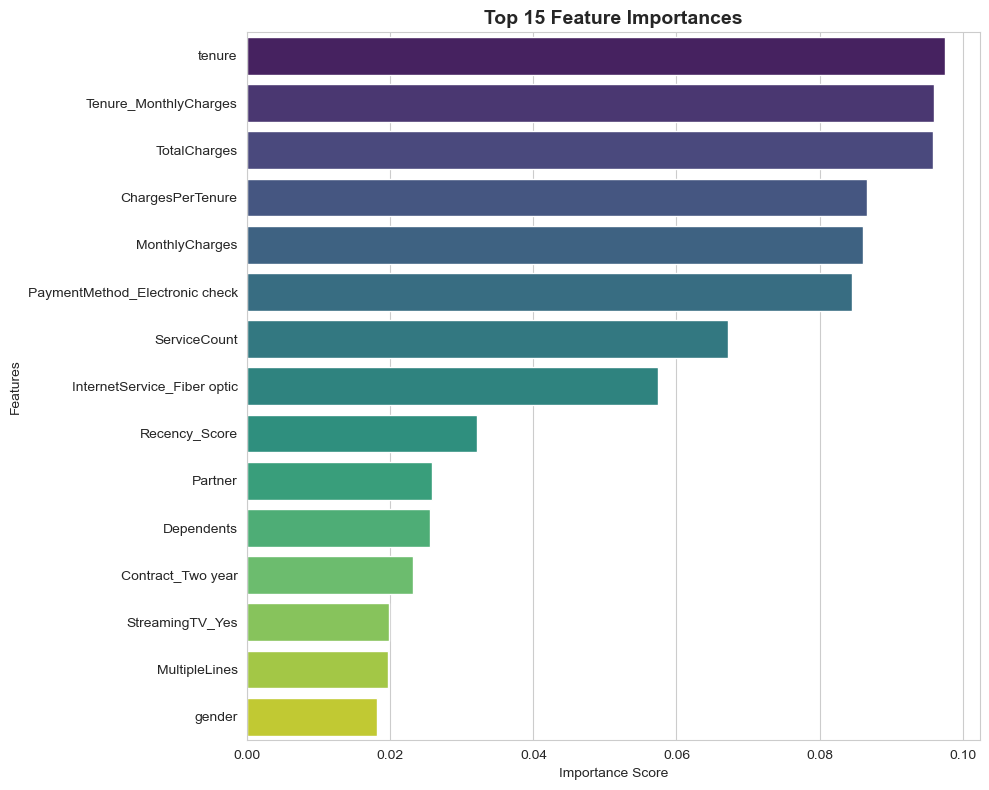


Top 10 Most Important Features:
                           Feature  Importance
4                           tenure    0.097562
13           Tenure_MonthlyCharges    0.095950
9                     TotalCharges    0.095881
12                ChargesPerTenure    0.086598
8                   MonthlyCharges    0.086141
31  PaymentMethod_Electronic check    0.084544
11                    ServiceCount    0.067134
14     InternetService_Fiber optic    0.057420
10                   Recency_Score    0.032079
2                          Partner    0.025757


In [32]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Feature Importances', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


In [31]:
# Generate insights based on feature importance and EDA
print("\n" + "="*80)
print("KEY BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*80)

insights = """
1. CONTRACT TYPE: Month-to-month contracts have highest churn risk
   → Recommendation: Offer incentives for annual/2-year contracts

2. TENURE: Customers in first year (0-12 months) are most vulnerable
   → Recommendation: Implement robust onboarding and early engagement programs

3. MONTHLY CHARGES: Higher monthly charges correlate with increased churn
   → Recommendation: Review pricing strategy and offer loyalty discounts

4. INTERNET SERVICE: Fiber optic customers show higher churn rates
   → Recommendation: Investigate service quality issues and improve customer support

5. LACK OF ONLINE SECURITY: Customers without security services churn more
   → Recommendation: Bundle security services with existing plans

6. PAYMENT METHOD: Electronic check users have higher churn
   → Recommendation: Promote automatic payment methods with small incentives

7. NO TECH SUPPORT: Absence of tech support increases churn likelihood
   → Recommendation: Offer complimentary tech support for first 3-6 months
"""

print(insights)



KEY BUSINESS INSIGHTS & RECOMMENDATIONS

1. CONTRACT TYPE: Month-to-month contracts have highest churn risk
   → Recommendation: Offer incentives for annual/2-year contracts

2. TENURE: Customers in first year (0-12 months) are most vulnerable
   → Recommendation: Implement robust onboarding and early engagement programs

3. MONTHLY CHARGES: Higher monthly charges correlate with increased churn
   → Recommendation: Review pricing strategy and offer loyalty discounts

4. INTERNET SERVICE: Fiber optic customers show higher churn rates
   → Recommendation: Investigate service quality issues and improve customer support

5. LACK OF ONLINE SECURITY: Customers without security services churn more
   → Recommendation: Bundle security services with existing plans

6. PAYMENT METHOD: Electronic check users have higher churn
   → Recommendation: Promote automatic payment methods with small incentives

7. NO TECH SUPPORT: Absence of tech support increases churn likelihood
   → Recommendation: Of